# Supplemental Figures

This Jupyter notebook reproduces a number of Supplemental Figures that are not included in any of the other notebooks.

In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white')

## Supplementary Figure S1 - Morphology (controls)

In [2]:
samples_control = (pd.read_csv('../data/raw/sb/samples_control.txt', sep='\t')
                     .assign(sample=lambda df: df['mouse']))
samples_control.head()

,mouse,genotype,pathology_type,sample
0,10KOU033,WapCre;Cdh1F/+;SB,adenocarcinoma,10KOU033
1,11KOU046,WapCre;Cdh1F/+;SB,adenocarcinoma,11KOU046
2,14SKA062,WapCre;Cdh1F/+;SB,adenocarcinoma,14SKA062
3,14SKA124,WapCre;Cdh1F/+;SB,spindle cell tumor,14SKA124
4,11KOU059,WapCre;Cdh1F/F,spindle cell tumor,11KOU059


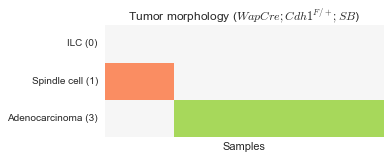

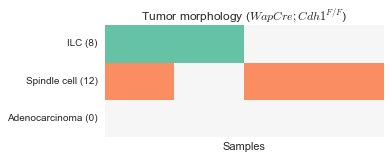

In [3]:
from copy import copy
from nbsupport.morphology import (parse_morphology, plot_morphology,
                                  MORPHOLOGY_TYPES, MORPHOLOGY_ORDER, 
                                  MORPHOLOGY_COLORS)

types = copy(MORPHOLOGY_TYPES)
types['Adenocarcinoma'] = 'adenocarcinoma'

order = MORPHOLOGY_ORDER[:2] + ('Adenocarcinoma', )
colors = MORPHOLOGY_COLORS[:2] + ('#a7d85b', )

for genotype, grp in samples_control.groupby('genotype'):
    morphology = parse_morphology(grp, morphology_types=types)
    
    fig, ax = plt.subplots(figsize=(5, 2))
    plot_morphology(morphology, order=order, colors=colors, ax=ax)

    genotype_label = (genotype.replace('F/F', '^{F/F}')
                              .replace('F/+', '^{F/+}'))
    ax.set_title('Tumor morphology ($\it{{{}}}$)'.format(genotype_label))
    
    
with sns.plotting_context('paper', font_scale=0.7):
    for genotype, grp in samples_control.groupby('genotype'):
        morphology = parse_morphology(grp, morphology_types=types)
    
        fig, ax = plt.subplots(figsize=(3, 1))
        plot_morphology(morphology, order=order, colors=colors, ax=ax)
        
        genotype_label = (genotype.replace('F/F', '^{F/F}')
                                  .replace('F/+', '^{F/+}'))

        ax.set_title(r'Tumor morphology ($\it{{{}}}$)'.format(genotype_label))
        
        name = genotype.split(';')[-1].replace('/', '').lower()
        fig.savefig('../reports/supplemental/figures/'
                    'fig_s1_morphology_{}.pdf'.format(name), bbox_inches='tight')
        plt.close(fig)

## Supplementary Figure S3 - Morphology/subtype line bias

This Supplementary Figure visualizes the distribution of tumor morphologies and expression subtypes across the two mouse lines (with different donor loci).

### Morphology

To visualize the distribution of tumor morphologies, we first load the sample/morphology data and then plot the number of samples with each morphology per strain using a count plot. This shows that the distribution of morphologies is highly similar between the two lines.

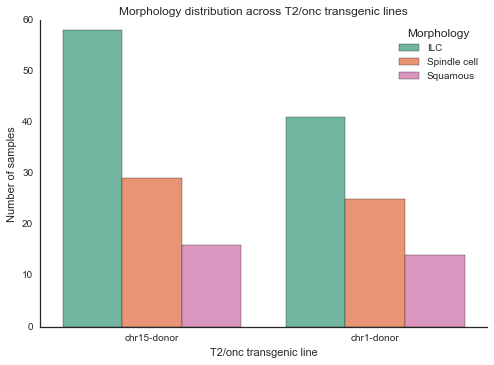

In [4]:
from matplotlib import pyplot as plt

from nbsupport.morphology import parse_morphology, MORPHOLOGY_ORDER, MORPHOLOGY_COLORS

# Read sample definition.
samples = pd.read_csv('../data/raw/sb/samples.txt', sep='\t')

# Define morphology annotation, melt to tidy (long) format.
morphology = (parse_morphology(samples)
              .reset_index()
              .pipe(pd.melt, id_vars='sample', var_name='morphology')
              .query('value == True')
              .drop('value', axis=1))

# Merge with strain info.
morphology = pd.merge(samples[['sample', 't2onc_type']], morphology, how='left')

# Plot.
fig, ax = plt.subplots()

sns.countplot(data=morphology, x='t2onc_type', hue='morphology',
              hue_order=MORPHOLOGY_ORDER, palette=MORPHOLOGY_COLORS)

ax.set_xlabel('T2/onc transgenic line')
ax.set_ylabel('Number of samples')
ax.set_title('Morphology distribution across T2/onc transgenic lines')
ax.legend(title='Morphology')
sns.despine(fig)

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(4, 3))
   
    sns.countplot(data=morphology, x='t2onc_type', hue='morphology',
                  hue_order=MORPHOLOGY_ORDER, palette=MORPHOLOGY_COLORS)

    ax.set_xlabel('T2/onc transgenic line')
    ax.set_ylabel('Number of samples')
    ax.set_title('Morphology distribution across T2/onc transgenic lines')
    ax.legend(title='Morphology')
    sns.despine(fig)
    
    fig.savefig('../reports/supplemental/figures/'
                'fig_s3_donor_morphology.pdf', bbox_inches='tight')
    plt.close(fig)

To formally test for associations between the SB line and morphology, we use the Fisher Exact test. This shows that there are no statistically significant associations between these variables:

In [5]:
from nbsupport.morphology import test_strain_bias

test_strain_bias(morphology, value='morphology', incl_neg=False)

,pos_chr1-donor,pos_chr15-donor,p_value,q_value
morphology,,,,
ILC,41,58,0.495455,0.676226
Spindle cell,25,29,0.584011,0.676226
Squamous,14,16,0.676226,0.676226


### Subtypes

Here, we perform a similar analysis as above for the gene expression subtypes.

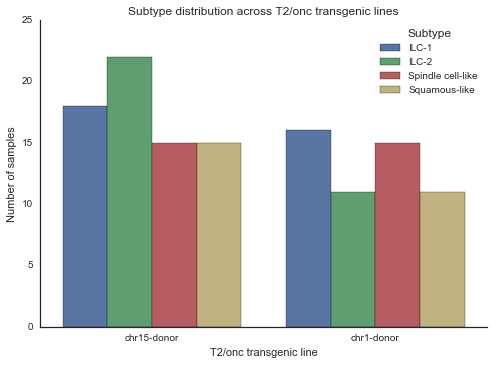

In [6]:
from nbsupport.expression.subtypes import SUBTYPE_ORDER, SUBTYPE_COLORS

# Read subtypes and merge with strain info.
subtypes = (pd.read_csv('../data/processed/sb/nmf/subtypes.txt', sep='\t')
              .rename(columns={'Unnamed: 0': 'sample'}))

subtypes = pd.merge(samples[['sample', 't2onc_type']], 
                    subtypes[['sample', 'subtype']],
                    on='sample', how='left')

# Plot.
fig, ax = plt.subplots()
sns.countplot(data=subtypes, x='t2onc_type', hue='subtype',
              hue_order=SUBTYPE_ORDER, palette=SUBTYPE_COLORS)
ax.set_xlabel('T2/onc transgenic line')
ax.set_ylabel('Number of samples')
ax.set_title('Subtype distribution across T2/onc transgenic lines')
ax.legend(title='Subtype')
sns.despine(fig)

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(4, 3))
    
    sns.countplot(data=subtypes, x='t2onc_type', hue='subtype',
                  hue_order=SUBTYPE_ORDER, palette=SUBTYPE_COLORS)

    ax.set_xlabel('T2/onc transgenic line')
    ax.set_ylabel('Number of samples')
    ax.set_title('Subtype distribution across T2/onc transgenic lines')
    ax.legend(title='Subtype')
    sns.despine(fig)
    
    fig.savefig('../reports/supplemental/figures/'
                'fig_s3_donor_subtypes.pdf', bbox_inches='tight')
    plt.close(fig)

The plots show that there is little bias (if any) between the two SB lines with respect to the expression subtypes. This is supported by our Fishers Exact test, which does not find any signfiicant associations:

In [7]:
test_strain_bias(subtypes, value='subtype', incl_neg=False)

,pos_chr1-donor,pos_chr15-donor,p_value,q_value
subtype,,,,
ILC-1,16,18,0.684632,0.912843
ILC-2,11,22,0.220706,0.806742
Spindle cell-like,15,15,0.403371,0.806742
Squamous-like,11,15,1.000000,1.000000


## Supplementary Figure S9 - Myh9 insertions

This Figure quantifies the number of insertions per sample for *Myh9*, showing that the most samples have a single insertion.

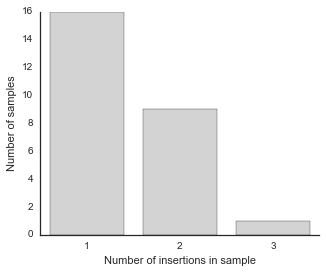

In [8]:
# Read insertions
insertions = pd.read_csv('../data/processed/sb/shear_splink/all/'
                         'insertions.cis.rbm.txt', sep='\t')

# Plot.
fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=(insertions.query('gene_name == "Myh9"')
                              .groupby('sample')['id'].nunique()
                              .to_frame(name='count')),
              x='count', color='lightgrey', ax=ax)
sns.despine()

ax.set_xlabel('Number of insertions in sample')
ax.set_ylabel('Number of samples')

# Plot again for manuscript.
with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(2.5, 2))
    sns.countplot(data=(insertions.query('gene_name == "Myh9"')
                                  .groupby('sample')['id'].nunique()
                                  .to_frame(name='count')),
                  x='count', color='lightgrey', ax=ax)
    sns.despine()

    ax.set_xlabel('Number of insertions in sample')
    ax.set_ylabel('Number of samples');
    
    fig.savefig('../reports/supplemental/figures/fig_s9_myh9_insertions.pdf',
                bbox_inches='tight')
    plt.close(fig)

## Supplementary Figure S12 - Morphology (validation)

This Supplementary Figure provides an overview of the morphology for the different tumors obtained in the validation of *Aspp2* (a.k.a. *Trp53bp2*) and *Mypt1* (a.k.a. *Ppp1r12a*) using the GEMM mouse models and the validation of *Myh9* via intraductal injection of sgRNAs targeting *Myh9*.

First, we read the morphology overview of these samples:

In [9]:
samples_val = (pd.read_csv('../data/raw/sb/samples_validation.txt', sep='\t')
                 .assign(sample=lambda df: df['mouse'] + '-' + df['block'].astype(str))
                 .query('pathology_type != "no tumor"'))

samples_val.groupby('genotype').size()

genotype
WcrH;Ecad;Aspp2    30
WcrH;Ecad;Mypt1    27
pLCG sgMyh9        11
dtype: int64

Next, we plot an overview of their morphologies, using the same style as used in the morphology analysis in Figure 1.

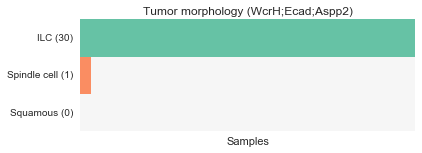

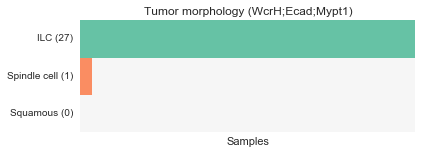

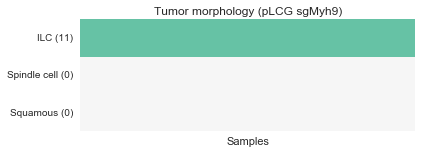

In [10]:
import re
from nbsupport.morphology import parse_morphology, plot_morphology

for genotype, grp in samples_val.groupby('genotype'):
    fig, ax = plt.subplots(figsize=(6, 2))
    plot_morphology(parse_morphology(grp), ax=ax)
    ax.set_title('Tumor morphology ({})'.format(genotype))

with sns.plotting_context('paper', font_scale=0.7):
    for genotype, grp in samples_val.groupby('genotype'):
        fig, ax = plt.subplots(figsize=(4, 1))
        plot_morphology(parse_morphology(grp), ax=ax)
        ax.set_title('Tumor morphology ($\it{{{}}}$)'.format(genotype))
    
        fig.savefig('../reports/supplemental/figures/fig_s12_gemm_morph_{}.pdf'
                    .format(re.split(r'[; ]', genotype)[-1].lower()),
                    bbox_inches='tight')
        plt.close(fig)

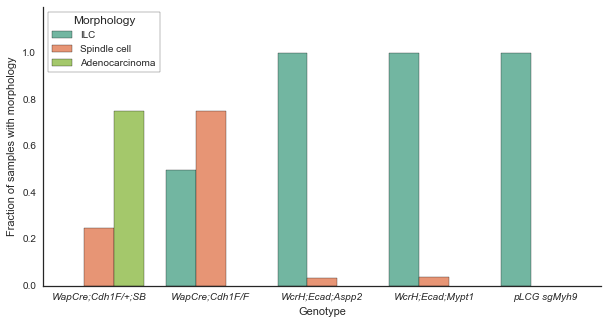

In [11]:
# Merge genotype pathology data and parse to morphologies.
merged_samples = (pd.concat([samples_control, samples_val], axis=0)
                  [['sample', 'genotype', 'pathology_type']])

merged_morphology = (
    parse_morphology(merged_samples, morphology_types=types)
    .reset_index()
    .pipe(pd.merge, right=merged_samples[['sample', 'genotype']],
          on='sample', how='left')
    .pipe(pd.melt, id_vars=['sample', 'genotype'], var_name='morphology')
    .query('value == True'))

# Calculate fractions of samples with morphology.
# Here weight = 1 / number of samples in genotype.
weights = (merged_morphology
           .groupby('genotype')['sample'].nunique()
           .pipe(lambda df: 1 / df)
           .reset_index(name='weight'))
        
merged_morphology_frac = (
    merged_morphology
    .pipe(pd.merge, right=weights, on='genotype', how='left')
    .groupby(['genotype', 'morphology'])['weight'].sum()
    .reset_index(name='fraction'))
 
# Plot as barplot.
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=merged_morphology_frac, x='genotype', y='fraction', 
            hue='morphology', hue_order=order, palette=colors, ax=ax) 
sns.despine(ax=ax)

ax.set_xlabel('Genotype')
ax.set_ylabel('Fraction of samples with morphology')
ax.set_yticks(np.arange(0, 1.1, 0.2))

plt.setp(ax.get_xticklabels(), fontstyle='italic')

ax.legend(title='Morphology', frameon=True, loc='best');